### Notebook Objective:

This notebook represents the final and most advanced stage of data preparation. The core goals are:


*   Create a Master DataFrame: Merge the cleaned job data with the classified job categories.
*   Engineer an 'AI Relevance' Score: Use a sophisticated Sentence Transformer model to calculate a score for each job, indicating how closely it relates to the concept of AI.
*   Classify AI Role Tiers: Analyze the relevance scores to define thresholds and categorize each job as a 'Traditional Role', 'AI-Impacted Role', or 'Core AI Role'.
*   Final Cleaning: Perform the last set of data cleaning tasks to create two polished, analysis-ready datasets.

### Note:


*   RUN THE CODE IN GPU MODE
*   this code is to be run after job classification into main and sub categories







## Part 1: Setup and Master DataFrame Creation

### 1.1. Installing Libraries and Mounting Drive

In [1]:
!pip install sentence-transformers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from google.colab import drive
import pandas as pd
from IPython.display import display
import sys
from sentence_transformers import SentenceTransformer, util
from tqdm.auto import tqdm
import torch
import pandas as pd
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)

Mounting Google Drive...
Mounted at /content/drive


### 1.2. Loading Processed Datasets

In [4]:
base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
cleaned_data_path = base_path + 'data_cleaning/cleaned_for_classification.csv'
classified_data_path = base_path + 'classified_jobs/classified_jobs.csv'

In [5]:
cleaned_df = pd.read_csv(cleaned_data_path)
classified_df = pd.read_csv(classified_data_path)
print("Files loaded successfully.")

Files loaded successfully.


### 1.3. Merging to Create the Master Analysis DataFrame

In [6]:
print("\nMerging new classification columns into the main DataFrame")
columns_to_add = ['job_id', 'main_category', 'sub_category', 'confidence_score']

analysis_df = pd.merge(
    cleaned_df,
    classified_df[columns_to_add],
    on='job_id',
    how='left'
    # Using left merge to keep all rows from the original cleaned_df
)
print("Merge complete.")


Merging new classification columns into the main DataFrame
Merge complete.


In [7]:
print("\n--- Master Analysis DataFrame is Ready! ---")
print("Displaying info to confirm all columns are now present:")
analysis_df.info()

print("\nDisplaying the first 5 rows of the final analysis table:")
analysis_df.head(50)


--- Master Analysis DataFrame is Ready! ---
Displaying info to confirm all columns are now present:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   title                       123849 non-null  object 
 2   description                 123842 non-null  object 
 3   max_salary                  29793 non-null   float64
 4   med_salary                  6280 non-null    float64
 5   min_salary                  29793 non-null   float64
 6   pay_period                  36073 non-null   object 
 7   location                    123849 non-null  object 
 8   company_id                  122132 non-null  float64
 9   formatted_work_type         123849 non-null  object 
 10  formatted_experience_level  94440 non-null   object 
 11  skills_desc                 2

,job_id,title,description,max_salary,med_salary,min_salary,pay_period,location,company_id,formatted_work_type,...,company_name,company_size,speciality,employee_count,skill_name,cleaned_skills,combined_text,main_category,sub_category,confidence_score
0,921716,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,NaN,17.0,HOURLY,"Princeton, NJ",2774458.0,Full-time,...,Corcoran Sawyer Smith,2.0,"['real estate', 'new development']",402.0,"['Marketing', 'Sales']","Marketing, Sales",marketing coordinator marketing sale job descr...,Human Resources,Talent Acquisition & Recruiting,0.412866
1,1829192,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,NaN,30.0,HOURLY,"Fort Collins, CO",NaN,Full-time,...,NaN,NaN,[],NaN,['Health Care Provider'],Health Care Provider,mental health therapist counselor health care ...,Healthcare (Research & Admin),Clinical & Patient Care,0.448669
2,10998357,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,NaN,45000.0,YEARLY,"Cincinnati, OH",64896719.0,Full-time,...,The National Exemplar,1.0,[],15.0,"['Management', 'Manufacturing']","Management, Manufacturing",assitant restaurant manager management manufac...,Consulting & Strategy,Major Consulting Firms,0.392926
3,23221523,Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,NaN,140000.0,YEARLY,"New Hyde Park, NY",766262.0,Full-time,...,"Abrams Fensterman, LLP",2.0,"['Civil Litigation', 'Corporate & Securities L...",222.0,['Other'],Other,senior elder law trust estate associate attorn...,Legal,Support & Paralegal,0.425426
4,35982263,Service Technician,Looking for HVAC service tech with experience ...,80000.0,NaN,60000.0,YEARLY,"Burlington, IA",NaN,Full-time,...,NaN,NaN,[],NaN,['Information Technology'],Information Technology,service technician information technology look...,Other,Other,0.414852
5,91700727,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,NaN,14.0,HOURLY,"Raleigh, NC",1481176.0,Internship,...,Downtown Raleigh Alliance,1.0,"['Economic Development', 'Clean & Safe Ambasso...",22.0,['Project Management'],Project Management,economic development planning intern project m...,Other,Other,0.317096
6,103254301,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,NaN,60000.0,YEARLY,United States,81942316.0,Contract,...,Raw Cereal,NaN,[],11.0,"['Design', 'Art/Creative', 'Information Techno...","Design, Art/Creative, Information Technology",producer design art creative information techn...,Marketing,"Content, Creative & Brand",0.675385
7,112576855,Building Engineer,Summary: Due to the pending retirement of our ...,120000.0,NaN,90000.0,YEARLY,"San Francisco, CA",NaN,Full-time,...,NaN,NaN,[],NaN,"['Management', 'Manufacturing']","Management, Manufacturing",building engineer management manufacturing sum...,Technology,"Infrastructure, Cloud & Operations",0.331292
8,1218575,Respiratory Therapist,"At Children’s, the region’s only full-service ...",NaN,NaN,NaN,NaN,"Omaha, NE",721189.0,Full-time,...,Children's Nebraska,5.0,"['Neonatology', 'Fetal Medicine', 'Cardiology'...",1793.0,['Health Care Provider'],Health Care Provider,respiratory therapist health care provider chi...,Other,Other,0.331576
9,2264355,Worship Leader,It is an exciting time to be a part of our chu...,NaN,350.0,NaN,MONTHLY,"Palm Bay, FL",28631247.0,Part-time,...,Bay West Church,NaN,"['Biblical preaching', 'Worship services', 'Di...",1.0,"['Design', 'Art/Creative', 'Information Techno...","Design, Art/Creative, Information Technology",worship leader design art creative information...,Other,Other,0.359510


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.width', 1000)
print("\nDisplaying the first 50 rows of the final analysis table:")
display(analysis_df.head(5))


Displaying the first 50 rows of the final analysis table:


,job_id,title,description,max_salary,med_salary,min_salary,pay_period,location,company_id,formatted_work_type,formatted_experience_level,skills_desc,work_type,currency,compensation_type,company_name,company_size,speciality,employee_count,skill_name,cleaned_skills,combined_text,main_category,sub_category,confidence_score
0,921716,Marketing Coordinator,"Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinary culture of cooperation and inclusion.Who you are:You must be a well-organized, creative, proactive, positive, and most importantly, kind-hearted person. Please, be responsible, respectful, and cool-under-pressure. Please, be proficient in Adobe Creative Cloud (Indesign, Illustrator, Photoshop) and Microsoft Office Suite. Above all, have fantastic taste and be a good-hearted, fun-loving person who loves working with people and is eager to learn.Role:Our office is a fast-paced environment. You’ll work directly with a Marketing team and communicate daily with other core staff and our large team of agents. This description is a brief overview, but your skills and interests will be considered in what you work on and as the role evolves over time.Agent Assistance- Receive & Organize Marketing Requests from Agents- Track Tasks & Communicate with Marketing team & Agents on Status- Prepare print materials and signs for open houses- Submit Orders to Printers & Communicate & Track DeadlinesGraphic Design & Branding- Managing brand strategy and messaging through website, social media, videos, online advertising, print placement and events- Receive, organize, and prioritize marketing requests from agents- Fulfill agent design requests including postcards, signs, email marketing and property brochures using pre-existing templates and creating custom designs- Maintain brand assets and generic filesEvents & Community- Plan and execute events and promotions- Manage Contacts & Vendors for Event Planning & SponsorshipsOur company is committed to creating a diverse environment and is proud to be an equal opportunity employer. All qualified applicants will receive consideration for employment without regard to race, color, religion, gender, gender identity or expression, sexual orientation, national origin, genetics, disability, age, or veteran status.Job Type: Full-time\nPay: $18-20/hour\nExpected hours: 35 – 45 per week\nBenefits:Paid time offSchedule:8 hour shiftMonday to FridayExperience:Marketing: 1 year (Preferred)Graphic design: 2 years (Preferred)Work Location: In person\n",20.0,NaN,17.0,HOURLY,"Princeton, NJ",2774458.0,Full-time,NaN,"Requirements: \n\nWe are seeking a College or Graduate Student (can also be completed with school) with a focus in Planning, Architecture, Real Estate Development or Management or General Business. Must be able to work in an extremely fast paced environment and able to multitask and prioritize.",FULL_TIME,USD,BASE_SALARY,Corcoran Sawyer Smith,2.0,"['real estate', 'new development']",402.0,"['Marketing', 'Sales']","Marketing, Sales",marketing coordinator marketing sale job descriptiona leading real estate firm new jersey seeking administrative marketing coordinator experience graphic design working closely fun kind ambitious member sale team dynamic executive team daily basis opportunity part fast growing highly respected real estate brokerage reputation exceptional marketing extraordinary culture cooperation inclusion must well organized creative proactive positive importantly kind hearted person please responsible respectful cool pressure please proficient adobe creative cloud indesign illustrator photoshop microsoft office suite fanta

## Part 2: Feature Engineering - AI Relevance Scoring

### 2.1. Setting Up the Sentence Transformer Model

We import our AI keywords and load the all-MiniLM-L6-v2 Sentence Transformer model. This model is excellent at converting text into numerical vectors (embeddings) that capture its semantic meaning. We'll ensure it runs on the GPU for speed.

In [9]:
keywords_folder_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/keywords/'
sys.path.append(keywords_folder_path)
try:
    from keywords_ai import AI_KEYWORDS
    print("keywords_ai.py imported successfully.")
except (ImportError, FileNotFoundError) as e:
    print(f"Error: Could not import AI_KEYWORDS. Make sure 'keywords_ai.py' is in the correct folder.")
    raise e

keywords_ai.py imported successfully.


In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"\nUsing device: {device}")
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)
print("Sentence Transformer model loaded.")


Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence Transformer model loaded.


### 2.2. Creating and Encoding the Target 'AI Concept'

We combine all our AI-related keywords into a single paragraph. The model then encodes this paragraph into one target vector that numerically represents the "concept of AI."

In [11]:
ai_concept_paragraph = ' '.join(AI_KEYWORDS)
print("\nEncoding the 'AI Concept' paragraph into a vector...")
ai_concept_embedding = model.encode(ai_concept_paragraph, convert_to_tensor=True, show_progress_bar=True)


Encoding the 'AI Concept' paragraph into a vector...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.3. Encoding All Job Descriptions (Embedding)

Now, the model processes every job's combined_text and converts each one into its own vector. This is the most time-consuming step.

In [12]:
print("\nEncoding all job descriptions into vectors (this will take a while)...")
job_texts = analysis_df['combined_text'].astype(str).tolist()
job_embeddings = model.encode(job_texts, convert_to_tensor=True, show_progress_bar=True, batch_size=32)
print("Job encoding complete.")


Encoding all job descriptions into vectors (this will take a while)...


Batches:   0%|          | 0/3871 [00:00<?, ?it/s]

Job encoding complete.


### 2.4. Calculating and Analyzing Scores

We use cosine similarity to compare each job vector to our target "AI Concept" vector. The result is a score from -1 to 1 (practically 0 to 1) where a higher score means the job text is semantically closer to the concept of AI.

In [13]:
print("\nCalculating AI relevance scores for all jobs")
cosine_scores = util.pytorch_cos_sim(job_embeddings, ai_concept_embedding)

analysis_df['ai_relevance_score'] = cosine_scores.cpu().numpy().flatten()
print("Scores calculated and added to the DataFrame.")
top_ai_jobs = analysis_df.sort_values(by='ai_relevance_score', ascending=False)


Calculating AI relevance scores for all jobs
Scores calculated and added to the DataFrame.


In [14]:
print("Displaying the top 15 most AI-relevant jobs found:")
display(top_ai_jobs[['title', 'main_category', 'ai_relevance_score']].head(15))

Displaying the top 15 most AI-relevant jobs found:


,title,main_category,ai_relevance_score
93825,AI/ML GenAI Engineer,Technology,0.694237
84208,AI/ML GenAI Engineer,Technology,0.694237
52026,Machine Learning Engineer- 10+year exp*,Technology,0.647007
115573,Artificial Intelligence Engineer,Technology,0.633383
1082,Generative AI Engineer,Technology,0.631012
91459,Gen AI Tech Lead,Technology,0.620532
50927,"AI/ML Solutions Architect (Data Analysis skills, SQL/Big Query, Python)",Technology,0.617511
118841,AI Solutions Architect,Technology,0.615783
663,Machine Learning Engineer,Technology,0.615620
7655,AI/ML Engineer (Contract) (Hybrid) – 4313,Technology,0.613614


In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Displaying the first 5 rows with all columns:")
display(analysis_df.head(5))

Displaying the first 5 rows with all columns:


,job_id,title,description,max_salary,med_salary,min_salary,pay_period,location,company_id,formatted_work_type,formatted_experience_level,skills_desc,work_type,currency,compensation_type,company_name,company_size,speciality,employee_count,skill_name,cleaned_skills,combined_text,main_category,sub_category,confidence_score,ai_relevance_score
0,921716,Marketing Coordinator,"Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinary culture of cooperation and inclusion.Who you are:You must be a well-organized, creative, proactive, positive, and most importantly, kind-hearted person. Please, be responsible, respectful, and cool-under-pressure. Please, be proficient in Adobe Creative Cloud (Indesign, Illustrator, Photoshop) and Microsoft Office Suite. Above all, have fantastic taste and be a good-hearted, fun-loving person who loves working with people and is eager to learn.Role:Our office is a fast-paced environment. You’ll work directly with a Marketing team and communicate daily with other core staff and our large team of agents. This description is a brief overview, but your skills and interests will be considered in what you work on and as the role evolves over time.Agent Assistance- Receive & Organize Marketing Requests from Agents- Track Tasks & Communicate with Marketing team & Agents on Status- Prepare print materials and signs for open houses- Submit Orders to Printers & Communicate & Track DeadlinesGraphic Design & Branding- Managing brand strategy and messaging through website, social media, videos, online advertising, print placement and events- Receive, organize, and prioritize marketing requests from agents- Fulfill agent design requests including postcards, signs, email marketing and property brochures using pre-existing templates and creating custom designs- Maintain brand assets and generic filesEvents & Community- Plan and execute events and promotions- Manage Contacts & Vendors for Event Planning & SponsorshipsOur company is committed to creating a diverse environment and is proud to be an equal opportunity employer. All qualified applicants will receive consideration for employment without regard to race, color, religion, gender, gender identity or expression, sexual orientation, national origin, genetics, disability, age, or veteran status.Job Type: Full-time\nPay: $18-20/hour\nExpected hours: 35 – 45 per week\nBenefits:Paid time offSchedule:8 hour shiftMonday to FridayExperience:Marketing: 1 year (Preferred)Graphic design: 2 years (Preferred)Work Location: In person\n",20.0,NaN,17.0,HOURLY,"Princeton, NJ",2774458.0,Full-time,NaN,"Requirements: \n\nWe are seeking a College or Graduate Student (can also be completed with school) with a focus in Planning, Architecture, Real Estate Development or Management or General Business. Must be able to work in an extremely fast paced environment and able to multitask and prioritize.",FULL_TIME,USD,BASE_SALARY,Corcoran Sawyer Smith,2.0,"['real estate', 'new development']",402.0,"['Marketing', 'Sales']","Marketing, Sales",marketing coordinator marketing sale job descriptiona leading real estate firm new jersey seeking administrative marketing coordinator experience graphic design working closely fun kind ambitious member sale team dynamic executive team daily basis opportunity part fast growing highly respected real estate brokerage reputation exceptional marketing extraordinary culture cooperation inclusion must well organized creative proactive positive importantly kind hearted person please responsible respectful cool pressure please proficient adobe creative cloud indesign illustrator photoshop microsoft

## Part 3: Exploratory Analysis - Determining AI Role Thresholds

Before we can classify jobs into tiers, we need to understand how the ai_relevance_score is distributed across different job categories. This exploratory analysis helps us set informed, data-driven thresholds.

### 3.1. Analyzing Score Distributions by Category

We'll loop through each main job category, plotting a histogram of its AI relevance scores and printing descriptive statistics. This gives us a clear picture of what a "high" or "low" score looks like for each field.

Starting individual analysis for 12 main categories...

ANALYSIS FOR: Human Resources


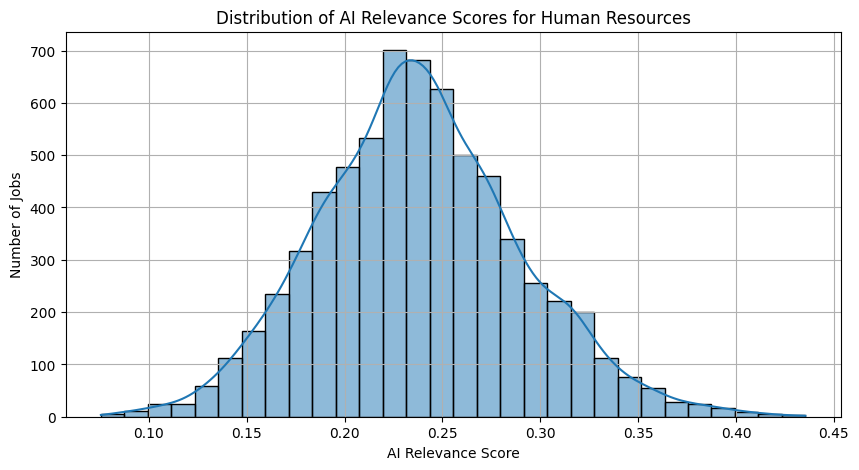


--- Descriptive Statistics for Human Resources ---
count    6708.000000
mean        0.238182
std         0.051995
min         0.075439
25%         0.203609
50%         0.236292
75%         0.270611
90%         0.307514
95%         0.326701
99%         0.370680
max         0.435464
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Human Resources ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
0,Marketing Coordinator,Talent Acquisition & Recruiting,0.260290
16,Administrative Coordinator,Core HR & Business Partnership,0.265382
30,Administrative Assistant,Core HR & Business Partnership,0.271509



Examples with scores between 0.4 and 0.5:


,title,sub_category,ai_relevance_score
26885,Data Specialist,Specialized HR & Analytics,0.420101
27686,Advanced Business Intelligence Analyst,Specialized HR & Analytics,0.415409
28101,MIG Welder I - Third Shift - O'Neal Manufacturing Services,Core HR & Business Partnership,0.417884



Examples with scores between 0.6 and 1.0:
No jobs found in this score range.

ANALYSIS FOR: Healthcare (Research & Admin)


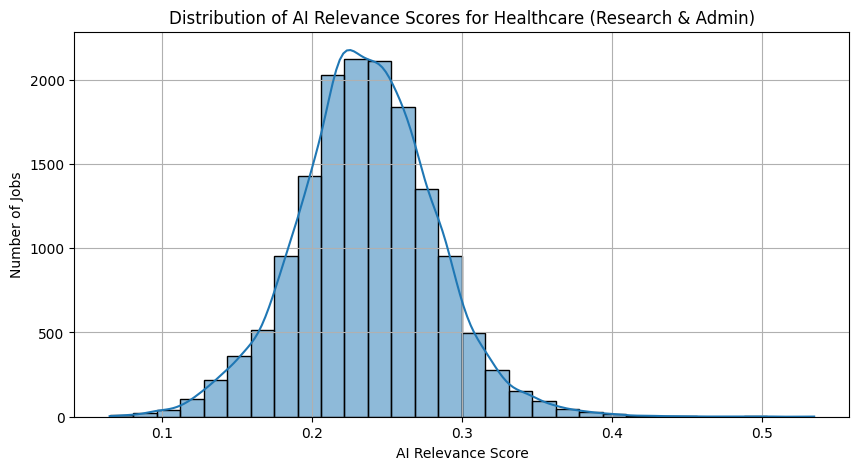


--- Descriptive Statistics for Healthcare (Research & Admin) ---
count    15174.000000
mean         0.236276
std          0.046110
min          0.065115
25%          0.207583
50%          0.235847
75%          0.265344
90%          0.291861
95%          0.310985
99%          0.354046
max          0.535059
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Healthcare (Research & Admin) ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
34,Registered Nurse,Clinical & Patient Care,0.250284
61,Front Desk Administrator,Clinical & Patient Care,0.291927
63,Board Certified Behavior Analyst,Clinical & Patient Care,0.276843



Examples with scores between 0.4 and 0.5:


,title,sub_category,ai_relevance_score
4606,Principal Data Scientist,Administration & Informatics,0.421556
8128,VP of Engineering,Administration & Informatics,0.438477
8375,Data_Entry Asistant,Administration & Informatics,0.499851



Examples with scores between 0.6 and 1.0:
No jobs found in this score range.

ANALYSIS FOR: Consulting & Strategy


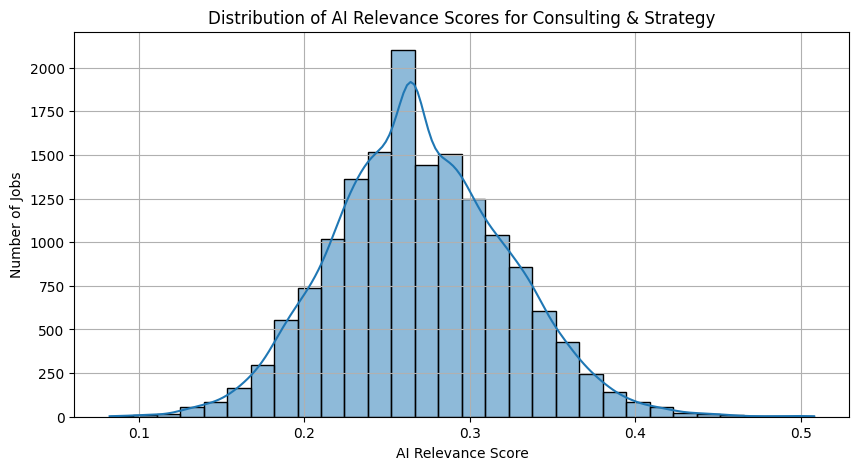


--- Descriptive Statistics for Consulting & Strategy ---
count    15641.000000
mean         0.270074
std          0.052782
min          0.082444
25%          0.234699
50%          0.265750
75%          0.304668
90%          0.338897
95%          0.358364
99%          0.398735
max          0.507920
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Consulting & Strategy ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
2,Assitant Restaurant Manager,Major Consulting Firms,0.235635
27,Loan Coordinator,Specialized & Domain-Specific Advisory,0.273264
46,"Manager, Retail Pharmacy",Specialized & Domain-Specific Advisory,0.208976



Examples with scores between 0.4 and 0.5:


,title,sub_category,ai_relevance_score
294,Accounts Payable Specialist,Specialized & Domain-Specific Advisory,0.426256
2283,Application Analyst,Specialized & Domain-Specific Advisory,0.431517
3167,Salesperson,Specialized & Domain-Specific Advisory,0.407894



Examples with scores between 0.6 and 1.0:
No jobs found in this score range.

ANALYSIS FOR: Legal


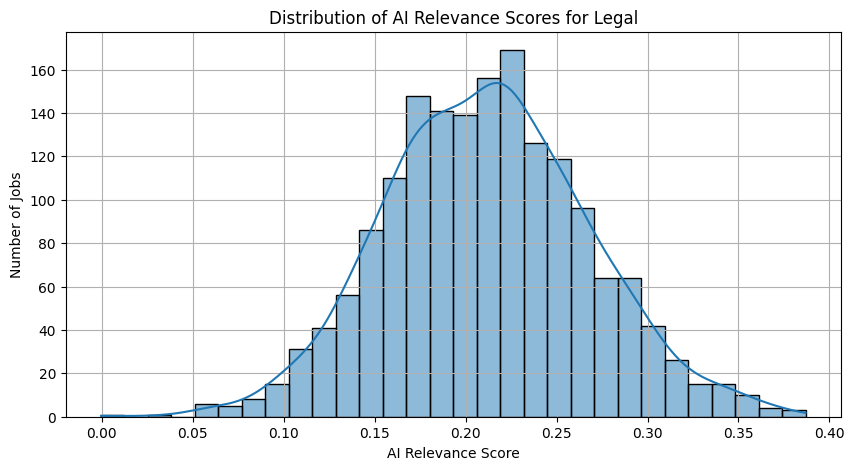


--- Descriptive Statistics for Legal ---
count    1697.000000
mean        0.211714
std         0.055990
min        -0.000444
25%         0.172431
50%         0.212355
75%         0.248462
90%         0.284981
95%         0.304689
99%         0.348079
max         0.386868
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Legal ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
3,Senior Elder Law / Trusts and Estates Associate Attorney,Support & Paralegal,0.222736
32,Legal Secretary,Support & Paralegal,0.226655
49,Transactional Attorney,Practicing Roles,0.205923



Examples with scores between 0.4 and 0.5:
No jobs found in this score range.

Examples with scores between 0.6 and 1.0:
No jobs found in this score range.

ANALYSIS FOR: Marketing


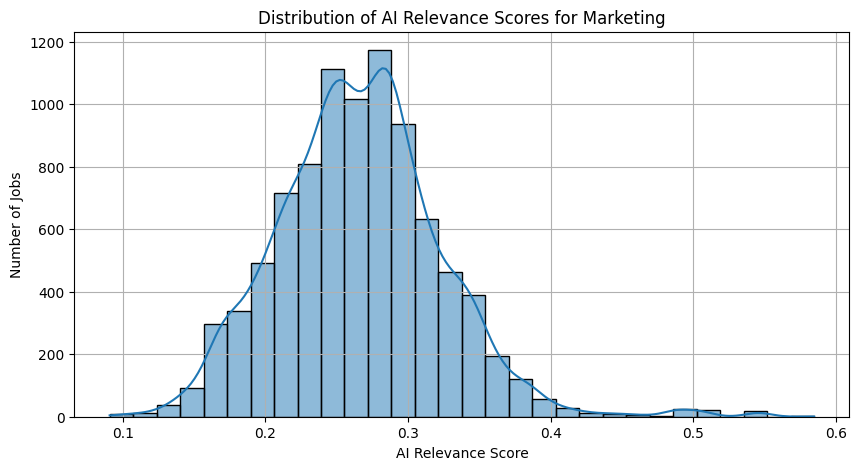


--- Descriptive Statistics for Marketing ---
count    9019.000000
mean        0.266251
std         0.057629
min         0.090846
25%         0.228671
50%         0.264942
75%         0.299433
90%         0.337323
95%         0.357056
99%         0.425711
max         0.584644
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Marketing ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
14,Senior Product Marketing Manager,Marketing Strategy & Analytics,0.276471
33,Salesperson,Marketing Strategy & Analytics,0.242616
51,Marketing Specialist,Marketing Strategy & Analytics,0.267035



Examples with scores between 0.4 and 0.5:


,title,sub_category,ai_relevance_score
5306,"Technical Writer, Knowledge Management","Content, Creative & Brand",0.481570
5385,"Principal Product Manager, Technical, Alexa Routines",Marketing Strategy & Analytics,0.450470
5395,"Sr. Manager, Business Intelligence , Community Operations",Marketing Strategy & Analytics,0.403575



Examples with scores between 0.6 and 1.0:
No jobs found in this score range.

ANALYSIS FOR: Technology


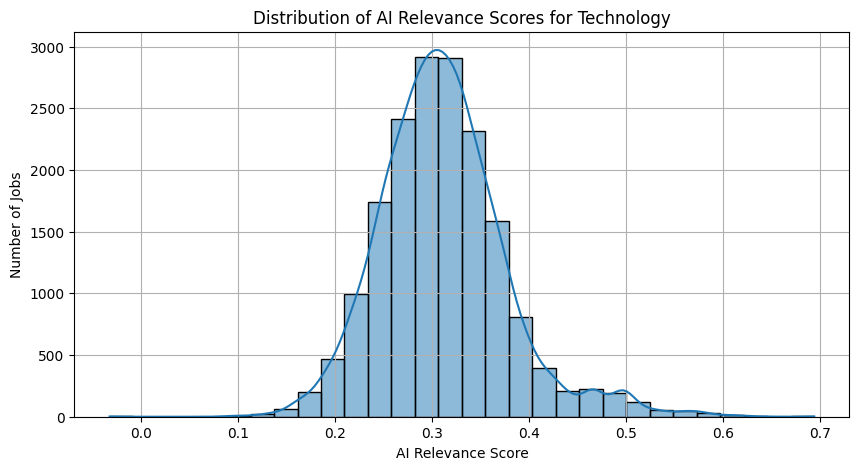


--- Descriptive Statistics for Technology ---
count    17734.000000
mean         0.311567
std          0.066570
min         -0.032026
25%          0.268868
50%          0.307166
75%          0.346623
90%          0.387810
95%          0.428170
99%          0.515220
max          0.694237
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Technology ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
7,Building Engineer,"Infrastructure, Cloud & Operations",0.252933
22,Software Engineer,"Data, AI & Analytics",0.260016
64,Lead Installer,Management & Product Leadership,0.234428



Examples with scores between 0.4 and 0.5:


,title,sub_category,ai_relevance_score
283,Sr Data Engineer with Kafka,"Cybersecurity, QA & Specialized Tech",0.410275
389,Data Analyst,"Cybersecurity, QA & Specialized Tech",0.411176
483,Senior Data Engineer/Analyst - Full Time,"Data, AI & Analytics",0.470150



Examples with scores between 0.6 and 1.0:


,title,sub_category,ai_relevance_score
663,Machine Learning Engineer,"Data, AI & Analytics",0.615620
1082,Generative AI Engineer,"Data, AI & Analytics",0.631012
5384,"Specialist Solutions Architect, GenAI","Data, AI & Analytics",0.610887



ANALYSIS FOR: Design


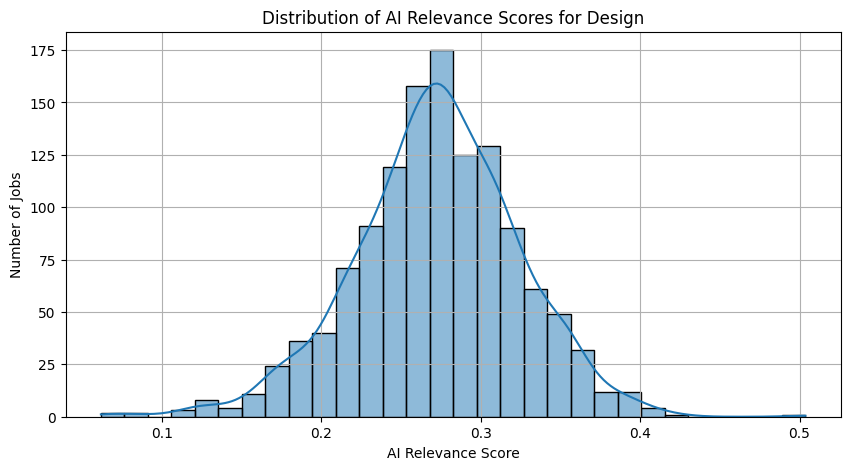


--- Descriptive Statistics for Design ---
count    1260.000000
mean        0.272420
std         0.051924
min         0.061763
25%         0.242466
50%         0.273333
75%         0.305957
90%         0.337211
95%         0.355162
99%         0.389193
max         0.503679
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Design ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
13,Structural Engineer,Specialized Design Roles,0.229375
23,Sheet Metal Fabricator,Specialized Design Roles,0.249876
112,Architectural Designer,Specialized Design Roles,0.290324



Examples with scores between 0.4 and 0.5:


,title,sub_category,ai_relevance_score
3780,Painter,Specialized Design Roles,0.401414
38308,Founding Product Designer,Digital Product & UX/UI,0.406053
57878,UX Design Intern,Digital Product & UX/UI,0.424764



Examples with scores between 0.6 and 1.0:
No jobs found in this score range.

ANALYSIS FOR: Automotive


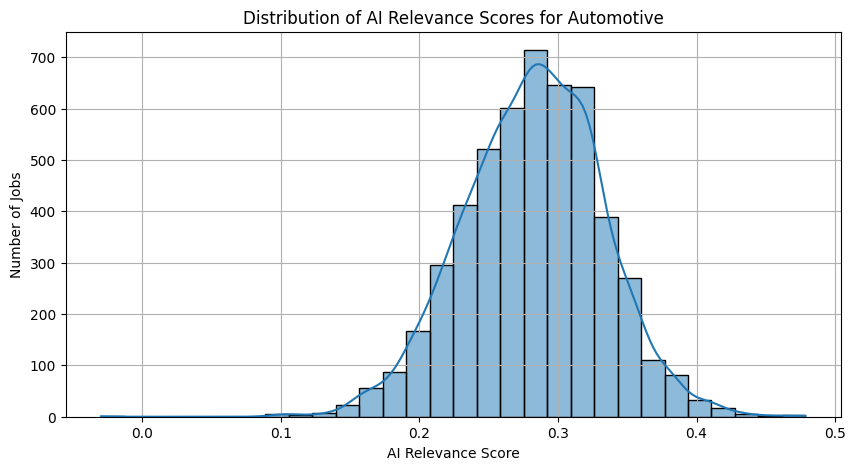


--- Descriptive Statistics for Automotive ---
count    5091.000000
mean        0.282153
std         0.050181
min        -0.029693
25%         0.248784
50%         0.283485
75%         0.316802
90%         0.343853
95%         0.359639
99%         0.399785
max         0.478554
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Automotive ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
243,Senior Project Engineer,Core Engineering & Systems,0.253914
285,Swiss Setup Operator,Core Engineering & Systems,0.286912
312,Technician,Core Engineering & Systems,0.282213



Examples with scores between 0.4 and 0.5:


,title,sub_category,ai_relevance_score
233,Mechanical Engineer,Core Engineering & Systems,0.412391
3720,Equipment Automation Technician - Day shift,Core Engineering & Systems,0.427645
3728,Equipment Automation Technician - Day shift,Core Engineering & Systems,0.427645



Examples with scores between 0.6 and 1.0:
No jobs found in this score range.

ANALYSIS FOR: Finance


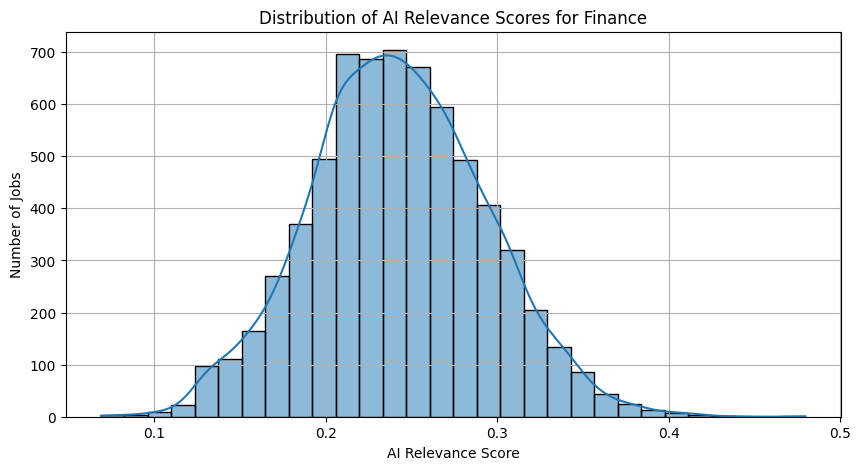


--- Descriptive Statistics for Finance ---
count    6637.000000
mean        0.242044
std         0.051259
min         0.068783
25%         0.206878
50%         0.240828
75%         0.276385
90%         0.308375
95%         0.327611
99%         0.363907
max         0.479639
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Finance ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
44,External Mortgage Loan Officer,Investment & Capital Markets,0.243306
69,FP&A Analyst,Corporate Finance & Financial Analysis,0.283726
125,"Director, Investment Sales",Investment & Capital Markets,0.252575



Examples with scores between 0.4 and 0.5:


,title,sub_category,ai_relevance_score
8362,Data_Analyst,Investment & Capital Markets,0.403651
17950,Entry Level Data_Analyst,Investment & Capital Markets,0.410834
24412,Accounting Specialist,"Accounting, Assurance & Tax",0.423653



Examples with scores between 0.6 and 1.0:
No jobs found in this score range.

ANALYSIS FOR: Education & EdTech


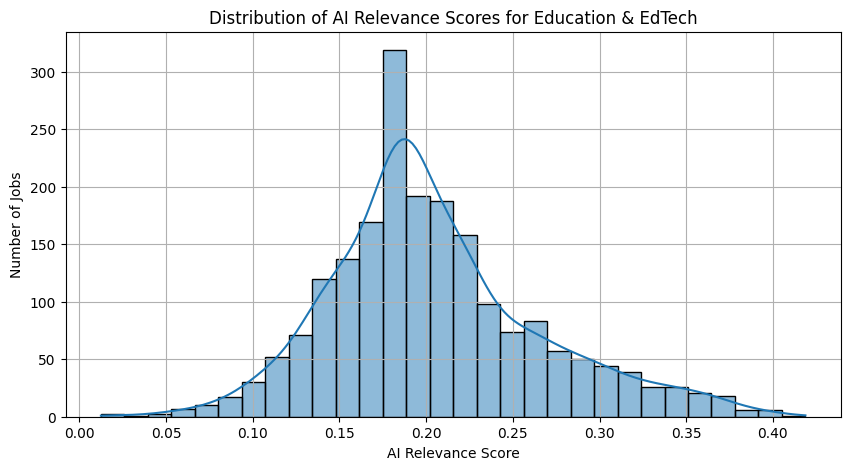


--- Descriptive Statistics for Education & EdTech ---
count    2024.000000
mean        0.204523
std         0.061300
min         0.012372
25%         0.167086
50%         0.193462
75%         0.233859
90%         0.291936
95%         0.326217
99%         0.370669
max         0.418783
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Education & EdTech ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
213,School Counselor,Academic & Training Roles,0.203942
308,Records Specialist & Academic Scheduler,Academic & Training Roles,0.225796
330,Upper School Mathematics Teacher,Academic & Training Roles,0.209125



Examples with scores between 0.4 and 0.5:


,title,sub_category,ai_relevance_score
38055,Assistant Technician,EdTech Product & Technology,0.418783
92339,Instructor /Trainer /Curriculum Designer,Academic & Training Roles,0.400176



Examples with scores between 0.6 and 1.0:
No jobs found in this score range.

ANALYSIS FOR: Supply Chain & Logistics


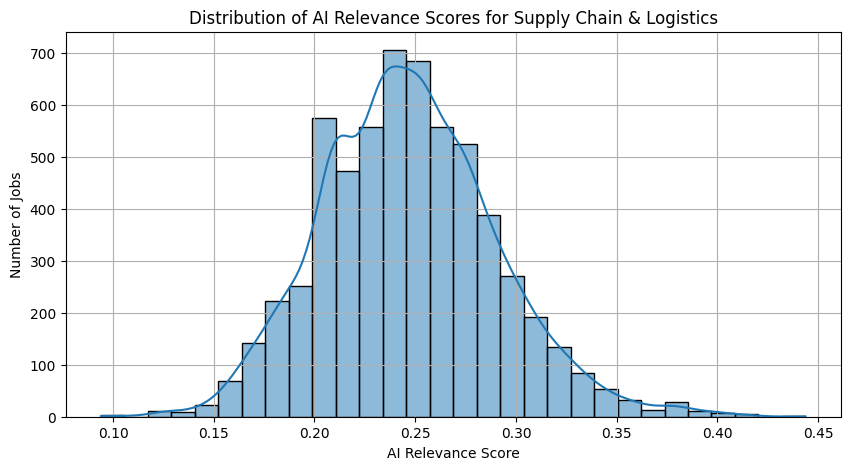


--- Descriptive Statistics for Supply Chain & Logistics ---
count    6031.000000
mean        0.246758
std         0.043426
min         0.093982
25%         0.216013
50%         0.244867
75%         0.273852
90%         0.302149
95%         0.321132
99%         0.364644
max         0.443645
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Supply Chain & Logistics ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
41,Chief Operating Officer,Logistics & Operations,0.284216
77,Associate Planner,Planning & Analytics,0.289265
100,Construction Project Manager,Procurement & Sourcing,0.276371



Examples with scores between 0.4 and 0.5:


,title,sub_category,ai_relevance_score
1552,Material Planner (40/Hr),Planning & Analytics,0.443645
28005,Hotel Maintenance Engineer,Logistics & Operations,0.403602
42772,Application Architect,Logistics & Operations,0.418255



Examples with scores between 0.6 and 1.0:
No jobs found in this score range.

ANALYSIS FOR: Media & Journalism


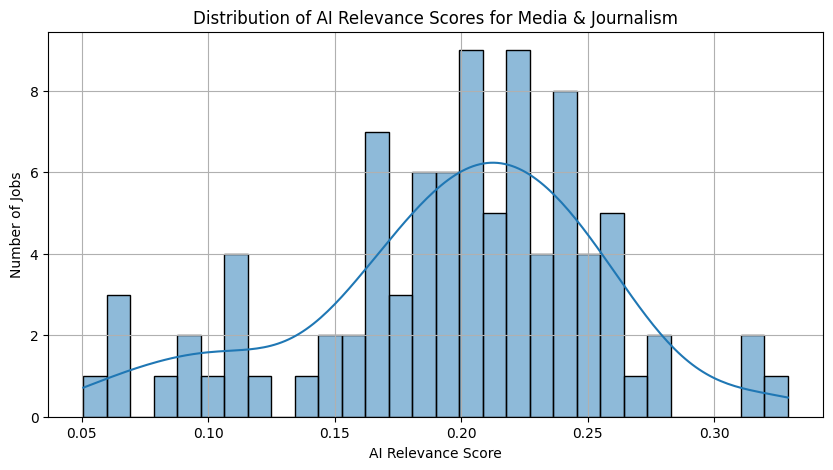


--- Descriptive Statistics for Media & Journalism ---
count    90.000000
mean      0.196993
std       0.057943
min       0.050637
25%       0.165936
50%       0.205736
75%       0.237177
90%       0.261772
95%       0.272646
99%       0.318092
max       0.329034
Name: ai_relevance_score, dtype: float64

--- Example Job Titles for Media & Journalism ---

Examples with scores between 0.2 and 0.3:


,title,sub_category,ai_relevance_score
1315,Web Editor (Remote),Content Creation & Journalism,0.223911
2308,Writer/Producer,Content Creation & Journalism,0.228280
5261,"Multimedia Journalist, KGTV",Content Creation & Journalism,0.200731



Examples with scores between 0.4 and 0.5:
No jobs found in this score range.

Examples with scores between 0.6 and 1.0:
No jobs found in this score range.


--- Individual analysis for all categories is complete. ---


In [16]:
categories_to_analyze = analysis_df[analysis_df['main_category'] != 'Other']['main_category'].unique()

print(f"Starting individual analysis for {len(categories_to_analyze)} main categories...")
for category in categories_to_analyze:
    print("\n" + "="*50)
    print(f"ANALYSIS FOR: {category}")
    print("="*50)

    category_df = analysis_df[analysis_df['main_category'] == category]

    plt.figure(figsize=(10, 5))
    sns.histplot(category_df['ai_relevance_score'], bins=30, kde=True)
    plt.title(f'Distribution of AI Relevance Scores for {category}')
    plt.xlabel('AI Relevance Score')
    plt.ylabel('Number of Jobs')
    plt.grid(True)
    plt.show()

    print(f"\n--- Descriptive Statistics for {category} ---")
    score_stats = category_df['ai_relevance_score'].describe(percentiles=[.25, .5, .75, .90, .95, .99])
    print(score_stats)

    print(f"\n--- Example Job Titles for {category} ---")

    def show_examples_for_category(df, score_min, score_max, num_examples=3):
        """Filters a category-specific DataFrame for a score range and shows examples."""
        sample = df[(df['ai_relevance_score'] >= score_min) & (df['ai_relevance_score'] < score_max)]
        print(f"\nExamples with scores between {score_min} and {score_max}:")
        if sample.empty:
            print("No jobs found in this score range.")
        else:
            display(sample[['title', 'sub_category', 'ai_relevance_score']].head(num_examples))

    show_examples_for_category(category_df, 0.2, 0.3)
    show_examples_for_category(category_df, 0.4, 0.5)
    show_examples_for_category(category_df, 0.6, 1.0)

print("\n\n--- Individual analysis for all categories is complete. ---")


### 3.2. Manual Inspection of Borderline Cases ( per job field )

hello

In [17]:
media_df = analysis_df[analysis_df['main_category'] == 'Media & Journalism']
borderline_media_jobs = media_df[
    (media_df['ai_relevance_score'] >= 0.28) &
    (media_df['ai_relevance_score'] < 0.32)
]

print("--- Borderline Jobs (Scores between 0.28 and 0.32) for Media & Journalism ---")
display(borderline_media_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Borderline Jobs (Scores between 0.28 and 0.32) for Media & Journalism ---


,title,sub_category,ai_relevance_score
8401,Document Specialist | Editor,Content Creation & Journalism,0.313431
8478,Copyeditor | DocumentEditor,Content Creation & Journalism,0.316740


In [18]:
education_df = analysis_df[analysis_df['main_category'] == 'Education & EdTech']
borderline_education_jobs = education_df[
    (education_df['ai_relevance_score'] >= 0.35) &
    (education_df['ai_relevance_score'] < 0.40)
]

print("--- Borderline Jobs (Scores between 0.35 and 0.40) for Education & EdTech ---")
display(borderline_education_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Borderline Jobs (Scores between 0.35 and 0.40) for Education & EdTech ---


,title,sub_category,ai_relevance_score
4921,Office EDI Administrator,EdTech Product & Technology,0.367505
6226,Tutor,Academic & Training Roles,0.397493
7249,Pc Technician Intern,EdTech Product & Technology,0.369400
7679,Video Training Content Developer (Contract) (Hybrid) – 4316,Instructional & Curriculum Design,0.353232
12221,Process Tech I (C Shift),EdTech Product & Technology,0.382800
16138,Desktop Technician 1,EdTech Product & Technology,0.360461
20581,Machine Operator-2nd Shift,EdTech Product & Technology,0.378319
23915,"Principal Software Engineer, Large Platform",EdTech Product & Technology,0.354681
25732,Metallurgist,EdTech Product & Technology,0.396501
33761,Hardware Designer Generalist,EdTech Product & Technology,0.366351


In [19]:
finance_df = analysis_df[analysis_df['main_category'] == 'Finance']

borderline_finance_jobs = finance_df[
    (finance_df['ai_relevance_score'] >= 0.35) &
    (finance_df['ai_relevance_score'] < 0.40)
]

print("--- Borderline Jobs (Scores between 0.35 and 0.40) for Finance ---")
display(borderline_finance_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Borderline Jobs (Scores between 0.35 and 0.40) for Finance ---


,title,sub_category,ai_relevance_score
83,Staff Accountant,"Accounting, Assurance & Tax",0.366038
686,EV/Cash Flow Analyst,Investment & Capital Markets,0.375571
721,Accountant,"Accounting, Assurance & Tax",0.364583
742,Accounts Payable Associate,"Accounting, Assurance & Tax",0.364651
825,Billing Specialist,"Accounting, Assurance & Tax",0.350899
...,...,...,...
118159,Finance and Adminstration Director,"Accounting, Assurance & Tax",0.353613
118912,Temporary Billing & Payments Specialist,"Accounting, Assurance & Tax",0.361327
119785,Business Analyst,Investment & Capital Markets,0.352135
121429,Intern - Asset Remarketing,Investment & Capital Markets,0.378797


In [20]:
automotive_df = analysis_df[analysis_df['main_category'] == 'Automotive']
borderline_automotive_jobs = automotive_df[
    (automotive_df['ai_relevance_score'] >= 0.35) &
    (automotive_df['ai_relevance_score'] < 0.40)
]
print("--- Borderline Jobs (Scores between 0.35 and 0.40) for Automotive ---")
display(borderline_automotive_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Borderline Jobs (Scores between 0.35 and 0.40) for Automotive ---


,title,sub_category,ai_relevance_score
195,Senior Mechanical Engineer,Core Engineering & Systems,0.351287
197,Mechanical Design Engineer,Core Engineering & Systems,0.355523
372,Mobile Application Developer,Core Engineering & Systems,0.366691
494,Electrical Engineer,Core Engineering & Systems,0.351059
608,Sustaining Engineer,Core Engineering & Systems,0.367225
...,...,...,...
122553,Machinist (CMO),Core Engineering & Systems,0.391725
122686,Senior Software Developer,Core Engineering & Systems,0.350240
123141,Chassis Design Engineer,Core Engineering & Systems,0.359111
123249,Filed Service Engineer II (Minimum of 3 Year Experience),Core Engineering & Systems,0.351708


In [21]:
design_df = analysis_df[analysis_df['main_category'] == 'Design']
borderline_design_jobs = design_df[
    (design_df['ai_relevance_score'] >= 0.35) &
    (design_df['ai_relevance_score'] < 0.40)
]

print(f"--- Found {len(borderline_design_jobs)} Borderline Jobs (Scores between 0.35 and 0.40) for Design ---")
display(borderline_design_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Found 75 Borderline Jobs (Scores between 0.35 and 0.40) for Design ---


,title,sub_category,ai_relevance_score
171,User Experience Designer,Digital Product & UX/UI,0.354129
261,Design Engineer (Stellantis Background),Digital Product & UX/UI,0.362077
2129,Design Technician,Digital Product & UX/UI,0.358898
4938,UX Designer - Kohler Ventures,Digital Product & UX/UI,0.355134
5579,BIM Modeler,Specialized Design Roles,0.388465
...,...,...,...
113331,"Technical Artist, Metaverse - Experience Builder",Digital Product & UX/UI,0.354197
114324,Print Production Designer,Specialized Design Roles,0.369056
115696,Drafter,Specialized Design Roles,0.360996
115935,2nd Shift Painter,Specialized Design Roles,0.352902


In [22]:
design_df = analysis_df[analysis_df['main_category'] == 'Design']
borderline_design_jobs = design_df[
    (design_df['ai_relevance_score'] >= 0.35) &
    (design_df['ai_relevance_score'] < 0.40)
]

print("--- Borderline Jobs (Scores between 0.35 and 0.40) for Design ---")
display(borderline_design_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Borderline Jobs (Scores between 0.35 and 0.40) for Design ---


,title,sub_category,ai_relevance_score
171,User Experience Designer,Digital Product & UX/UI,0.354129
261,Design Engineer (Stellantis Background),Digital Product & UX/UI,0.362077
2129,Design Technician,Digital Product & UX/UI,0.358898
4938,UX Designer - Kohler Ventures,Digital Product & UX/UI,0.355134
5579,BIM Modeler,Specialized Design Roles,0.388465
...,...,...,...
113331,"Technical Artist, Metaverse - Experience Builder",Digital Product & UX/UI,0.354197
114324,Print Production Designer,Specialized Design Roles,0.369056
115696,Drafter,Specialized Design Roles,0.360996
115935,2nd Shift Painter,Specialized Design Roles,0.352902


In [23]:
technology_df = analysis_df[analysis_df['main_category'] == 'Technology'].copy()
score_bins = [-float('inf'), 0.28, 0.55, float('inf')]
tier_labels = [
    'Traditional Role',
    'AI-Impacted Role',
    'Core AI Role'
]
technology_df['ai_role_tier_check'] = pd.cut(
    technology_df['ai_relevance_score'],
    bins=score_bins,
    labels=tier_labels,
    right=False
)
tier_counts = technology_df['ai_role_tier_check'].value_counts()
print("--- Job Distribution for Technology using new thresholds ---")
print(tier_counts)

--- Job Distribution for Technology using new thresholds ---
ai_role_tier_check
AI-Impacted Role    12046
Traditional Role     5595
Core AI Role           93
Name: count, dtype: int64


In [24]:
marketing_df = analysis_df[analysis_df['main_category'] == 'Marketing']
borderline_marketing_jobs = marketing_df[
    (marketing_df['ai_relevance_score'] >= 0.30) &
    (marketing_df['ai_relevance_score'] < 0.35)
]
print("--- Borderline Jobs (Scores between 0.30 and 0.35) for Marketing ---")
display(borderline_marketing_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Borderline Jobs (Scores between 0.30 and 0.35) for Marketing ---


,title,sub_category,ai_relevance_score
6,Producer,"Content, Creative & Brand",0.339463
86,Intern- Business Analytics,Marketing Strategy & Analytics,0.340750
103,Digital Marketing Intern,Digital & Performance Marketing,0.316039
210,Car Salesperson,Marketing Strategy & Analytics,0.301819
227,Team Lead,Marketing Strategy & Analytics,0.320476
...,...,...,...
123196,Solution Engineer - CRM,Marketing Strategy & Analytics,0.308614
123409,Quality Engineer,Marketing Strategy & Analytics,0.324659
123520,Credit & Collections Analyst,Marketing Strategy & Analytics,0.324690
123521,Director of Product (Integrations),Marketing Strategy & Analytics,0.316269


In [25]:
legal_df = analysis_df[analysis_df['main_category'] == 'Legal']

borderline_legal_jobs = legal_df[
    (legal_df['ai_relevance_score'] >= 0.28) &
    (legal_df['ai_relevance_score'] < 0.32)
]
print("--- Borderline Jobs (Scores around 0.30) for Legal ---")
display(borderline_legal_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Borderline Jobs (Scores around 0.30) for Legal ---


,title,sub_category,ai_relevance_score
396,Legal Assistant Paralegal,Support & Paralegal,0.285634
1041,Contract Administrator,Specialized & Tech,0.305107
1538,"Assistant Claims Examiner (Remote, USA)",Support & Paralegal,0.294529
1539,Assistant Claims Examiner (Remote USA),Support & Paralegal,0.296157
1785,Counsel,Practicing Roles,0.318060
...,...,...,...
121459,Legal Administrative Assistant,Support & Paralegal,0.297025
122247,Assistant,Support & Paralegal,0.292570
122526,Real Estate Legal Assistant,Support & Paralegal,0.287425
123574,Compliance Analyst I,Specialized & Tech,0.319675


In [26]:
healthcare_df = analysis_df[analysis_df['main_category'] == 'Healthcare (Research & Admin)']
borderline_healthcare_jobs = healthcare_df[
    (healthcare_df['ai_relevance_score'] >= 0.35) &
    (healthcare_df['ai_relevance_score'] < 0.40)
]
print("--- Borderline Jobs (Scores between 0.35 and 0.40) for Healthcare ---")
display(borderline_healthcare_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Borderline Jobs (Scores between 0.35 and 0.40) for Healthcare ---


,title,sub_category,ai_relevance_score
65,Med-RN ER,Clinical & Patient Care,0.370526
1234,Patient Physician Services - Call Center Representative,Administration & Informatics,0.368237
1729,Clinical Manager - Nurses Wanted!,Clinical & Patient Care,0.359709
4201,PATIENT MONITORING NAVIGATOR,Administration & Informatics,0.350608
4494,Accounts Support Specialist,Clinical & Patient Care,0.373959
...,...,...,...
117094,"Records Management Specialist-Office Based, Greenwood, IN",Administration & Informatics,0.376070
120670,"Scientist, Laboratory Automation",Research & Biotechnology,0.363027
121601,Medical Assistant/LPN,Clinical & Patient Care,0.376803
123019,"Medical Assistant Neurology (Full Time, Day shift)",Clinical & Patient Care,0.355321


In [27]:
hr_df = analysis_df[analysis_df['main_category'] == 'Human Resources']
borderline_hr_jobs = hr_df[
    (hr_df['ai_relevance_score'] >= 0.30) &
    (hr_df['ai_relevance_score'] < 0.35)
]
print("--- Borderline Jobs (Scores between 0.30 and 0.35) for Human Resources ---")
display(borderline_hr_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Borderline Jobs (Scores between 0.30 and 0.35) for Human Resources ---


,title,sub_category,ai_relevance_score
58,Office Manager,Core HR & Business Partnership,0.339358
191,Sales Development Representative,Talent Acquisition & Recruiting,0.332177
259,Mortgage Loan Officer,Talent Acquisition & Recruiting,0.305397
315,Resolution Analyst,Specialized HR & Analytics,0.307693
913,Sr. Project Analyst - Value Management (Hospital & Healthcare),Specialized HR & Analytics,0.324733
...,...,...,...
122809,Data Scientist,Specialized HR & Analytics,0.316290
122951,Estimator,Specialized HR & Analytics,0.316489
123297,"Admin Assistant 2, Part-time, Ammon ID, Deseret Industries",Core HR & Business Partnership,0.313627
123445,"Admin Assistant 2 Deseret Industries, Boise Idaho",Core HR & Business Partnership,0.308864


In [28]:
consulting_df = analysis_df[analysis_df['main_category'] == 'Consulting & Strategy']

borderline_jobs = consulting_df[
    (consulting_df['ai_relevance_score'] >= 0.35) &
    (consulting_df['ai_relevance_score'] < 0.40)
]
print("--- Borderline Jobs (Scores between 0.35 and 0.40) for Consulting & Strategy ---")
display(borderline_jobs[['title', 'sub_category', 'ai_relevance_score']])

--- Borderline Jobs (Scores between 0.35 and 0.40) for Consulting & Strategy ---


,title,sub_category,ai_relevance_score
133,Administrative Assistant Project Coordinator,Specialized & Domain-Specific Advisory,0.392688
279,Administrative Assistant,Specialized & Domain-Specific Advisory,0.357566
348,Receptionist/Data Entry,Specialized & Domain-Specific Advisory,0.365842
375,BI Reporting Lead,Specialized & Domain-Specific Advisory,0.358339
480,Manager - Accounts and Publishers,Specialized & Domain-Specific Advisory,0.357178
...,...,...,...
121760,Sr. Teamcenter Developer,Specialized & Domain-Specific Advisory,0.354112
121945,Adobe AEM Architect,Specialized & Domain-Specific Advisory,0.368117
121975,Guidewire Business Analyst,Core & Management Strategy,0.355545
122246,AEM Technical Architects (Adobe),Specialized & Domain-Specific Advisory,0.385393


## Part 4: Classifying Jobs into AI Tiers

### 4.1. Defining Category-Specific Thresholds

We create a dictionary to hold the unique thresholds for each job category. A default is used for any category not specified. float('inf') is used where a category has no 'Core AI' roles.

In [29]:
import pandas as pd
import numpy as np
from IPython.display import display

new_category_thresholds = {}
categories = analysis_df[analysis_df['main_category'] != 'Other']['main_category'].unique()

for category in categories:
    category_df = analysis_df[analysis_df['main_category'] == category]
    impacted_threshold = round(category_df['ai_relevance_score'].quantile(0.75), 2)
    core_ai_threshold = round(category_df['ai_relevance_score'].quantile(0.95), 2)
    if core_ai_threshold <= impacted_threshold:
        core_ai_threshold = impacted_threshold + 0.01
    new_category_thresholds[category] = {
        'traditional': impacted_threshold,
        'impacted': core_ai_threshold
    }

new_category_thresholds['Technology'] = {'traditional': 0.28, 'impacted': 0.55}
default_thresholds = {'traditional': 0.40, 'impacted': 0.60}

### 4.2. Applying the Classification Logic

This function applies our custom thresholds to each row in the DataFrame to assign an ai_role_type. We also include a special rule to ensure no 'Technology' job is classified as purely 'Traditional'.

In [30]:
def classify_ai_tier_new(row):
    main_cat = row['main_category']
    score = row['ai_relevance_score']
    thresholds = new_category_thresholds.get(main_cat, default_thresholds)
    if score >= thresholds['impacted']:
        return 'Core AI Role'
    elif score >= thresholds['traditional']:
        return 'AI-Impacted Role'
    else:
        return 'Traditional Role'

analysis_df['ai_role_type'] = analysis_df.apply(classify_ai_tier_new, axis=1)

tech_upgrade_mask = (analysis_df['main_category'] == 'Technology') & (analysis_df['ai_role_type'] == 'Traditional Role')
if tech_upgrade_mask.sum() > 0:
    analysis_df.loc[tech_upgrade_mask, 'ai_role_type'] = 'AI-Impacted Role'
    print(f"Applied special rule: Upgraded {tech_upgrade_mask.sum()} 'Technology' jobs from 'Traditional' to 'AI-Impacted'.")

print("\n--- Final Classification is Complete! ---")
print("\nFinal distribution of jobs across the three tiers:")
print(analysis_df['ai_role_type'].value_counts())

print("\nSample of the final DataFrame with the correct 'ai_role_type' column:")
display(analysis_df[['title', 'main_category', 'ai_relevance_score', 'ai_role_type']].head(15))

Applied special rule: Upgraded 5595 'Technology' jobs from 'Traditional' to 'AI-Impacted'.

--- Final Classification is Complete! ---

Final distribution of jobs across the three tiers:
ai_role_type
Traditional Role    88968
AI-Impacted Role    31431
Core AI Role         3450
Name: count, dtype: int64

Sample of the final DataFrame with the correct 'ai_role_type' column:


,title,main_category,ai_relevance_score,ai_role_type
0,Marketing Coordinator,Human Resources,0.260290,Traditional Role
1,Mental Health Therapist/Counselor,Healthcare (Research & Admin),0.180139,Traditional Role
2,Assitant Restaurant Manager,Consulting & Strategy,0.235635,Traditional Role
3,Senior Elder Law / Trusts and Estates Associate Attorney,Legal,0.222736,Traditional Role
4,Service Technician,Other,0.325123,Traditional Role
5,Economic Development and Planning Intern,Other,0.155000,Traditional Role
6,Producer,Marketing,0.339463,AI-Impacted Role
7,Building Engineer,Technology,0.252933,AI-Impacted Role
8,Respiratory Therapist,Other,0.198703,Traditional Role
9,Worship Leader,Other,0.202023,Traditional Role


## Part 5: Preparing Final DataFrames for Downstream Use

Now that our main analysis and feature engineering are done, we will select the final columns needed and create two separate, clean DataFrames: one for dashboarding (dashboard_df) and one for future modeling (modeling_df).

### Data Cleaning : checking how ready the columns are

In [31]:
column_list = analysis_df.columns.tolist()
print("--- List of All Columns ---")
print(column_list)

print("\n\n--- Detailed Summary of Each Column ---")
analysis_df.info()

--- List of All Columns ---
['job_id', 'title', 'description', 'max_salary', 'med_salary', 'min_salary', 'pay_period', 'location', 'company_id', 'formatted_work_type', 'formatted_experience_level', 'skills_desc', 'work_type', 'currency', 'compensation_type', 'company_name', 'company_size', 'speciality', 'employee_count', 'skill_name', 'cleaned_skills', 'combined_text', 'main_category', 'sub_category', 'confidence_score', 'ai_relevance_score', 'ai_role_type']


--- Detailed Summary of Each Column ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   title                       123849 non-null  object 
 2   description                 123842 non-null  object 
 3   max_salary                  29793 non-null   float64
 4   med_salary                  628

## Working on selecting the req columns which will be used ahead in analysis
will be then performing complete data cleaning on all the these selected columns taken in a new df

*Note : If any column is missing and edit this code at later point of time to include req column when neeed and run the complete code*

In [32]:
import pandas as pd
from IPython.display import display
if 'original_listed_time' in analysis_df.columns:
    analysis_df['date_posted'] = pd.to_datetime(analysis_df['original_listed_time'] / 1000, unit='s').dt.date
else:
    analysis_df['date_posted'] = pd.NaT

final_columns_for_dashboard = [
    'job_id', 'title', 'company_name', 'location', 'date_posted',
    'main_category', 'sub_category', 'ai_role_type', 'ai_relevance_score',
    'formatted_experience_level', 'min_salary', 'med_salary', 'max_salary',
    'pay_period', 'currency', 'cleaned_skills'
]
dashboard_df = analysis_df[final_columns_for_dashboard].copy()
print("--- Final DataFrame for Dashboard is Ready! ---")
dashboard_df.info()

print("\nSample of the final dashboard data:")
display(dashboard_df.head())

--- Final DataFrame for Dashboard is Ready! ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   job_id                      123849 non-null  int64         
 1   title                       123849 non-null  object        
 2   company_name                122130 non-null  object        
 3   location                    123849 non-null  object        
 4   date_posted                 0 non-null       datetime64[ns]
 5   main_category               123849 non-null  object        
 6   sub_category                123849 non-null  object        
 7   ai_role_type                123849 non-null  object        
 8   ai_relevance_score          123849 non-null  float32       
 9   formatted_experience_level  94440 non-null   object        
 10  min_salary                  29793 non-null   float64    

,job_id,title,company_name,location,date_posted,main_category,sub_category,ai_role_type,ai_relevance_score,formatted_experience_level,min_salary,med_salary,max_salary,pay_period,currency,cleaned_skills
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,"Princeton, NJ",NaT,Human Resources,Talent Acquisition & Recruiting,Traditional Role,0.260290,NaN,17.0,NaN,20.0,HOURLY,USD,"Marketing, Sales"
1,1829192,Mental Health Therapist/Counselor,NaN,"Fort Collins, CO",NaT,Healthcare (Research & Admin),Clinical & Patient Care,Traditional Role,0.180139,NaN,30.0,NaN,50.0,HOURLY,USD,Health Care Provider
2,10998357,Assitant Restaurant Manager,The National Exemplar,"Cincinnati, OH",NaT,Consulting & Strategy,Major Consulting Firms,Traditional Role,0.235635,NaN,45000.0,NaN,65000.0,YEARLY,USD,"Management, Manufacturing"
3,23221523,Senior Elder Law / Trusts and Estates Associate Attorney,"Abrams Fensterman, LLP","New Hyde Park, NY",NaT,Legal,Support & Paralegal,Traditional Role,0.222736,NaN,140000.0,NaN,175000.0,YEARLY,USD,Other
4,35982263,Service Technician,NaN,"Burlington, IA",NaT,Other,Other,Traditional Role,0.325123,NaN,60000.0,NaN,80000.0,YEARLY,USD,Information Technology


In [33]:
if 'original_listed_time' in analysis_df.columns:
    analysis_df['date_posted'] = pd.to_datetime(analysis_df['original_listed_time'] / 1000, unit='s').dt.date
else:
    analysis_df['date_posted'] = pd.NaT

final_columns = [
    'job_id', 'title', 'company_name', 'location', 'date_posted',
    'main_category', 'sub_category', 'ai_role_type', 'ai_relevance_score',
    'formatted_experience_level', 'min_salary', 'med_salary', 'max_salary',
    'pay_period', 'currency', 'cleaned_skills', 'combined_text'
]
dashboard_df = analysis_df[final_columns].copy()
print("--- Final DataFrame for Dashboard & Modeling is Ready! ---")
dashboard_df.info()

print("\nSample of the final data:")
display(dashboard_df.head())

--- Final DataFrame for Dashboard & Modeling is Ready! ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   job_id                      123849 non-null  int64         
 1   title                       123849 non-null  object        
 2   company_name                122130 non-null  object        
 3   location                    123849 non-null  object        
 4   date_posted                 0 non-null       datetime64[ns]
 5   main_category               123849 non-null  object        
 6   sub_category                123849 non-null  object        
 7   ai_role_type                123849 non-null  object        
 8   ai_relevance_score          123849 non-null  float32       
 9   formatted_experience_level  94440 non-null   object        
 10  min_salary                  29793 non-null   

,job_id,title,company_name,location,date_posted,main_category,sub_category,ai_role_type,ai_relevance_score,formatted_experience_level,min_salary,med_salary,max_salary,pay_period,currency,cleaned_skills,combined_text
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,"Princeton, NJ",NaT,Human Resources,Talent Acquisition & Recruiting,Traditional Role,0.260290,NaN,17.0,NaN,20.0,HOURLY,USD,"Marketing, Sales",marketing coordinator marketing sale job descriptiona leading real estate firm new jersey seeking administrative marketing coordinator experience graphic design working closely fun kind ambitious member sale team dynamic executive team daily basis opportunity part fast growing highly respected real estate brokerage reputation exceptional marketing extraordinary culture cooperation inclusion must well organized creative proactive positive importantly kind hearted person please responsible respectful cool pressure please proficient adobe creative cloud indesign illustrator photoshop microsoft office suite fantastic taste good hearted fun loving person love working people eager learn role office fast paced environment work directly marketing team communicate daily core staff large team agent description brief overview skill interest considered work role evolves time agent assistance receive organize marketing request agent track task communicate marketing team agent status prepare print material sign open house submit order printer communicate track deadlinesgraphic design branding managing brand strategy messaging website social medium video online advertising print placement event receive organize prioritize marketing request agent fulfill agent design request including postcard sign email marketing property brochure using pre existing template creating custom design maintain brand asset generic filesevents community plan execute event promotion manage contact vendor event planning sponsorshipsour company committed creating diverse environment proud equal opportunity employer qualified applicant receive consideration employment without regard race color religion gender gender identity expression sexual orientation national origin genetics disability age veteran status job type full time pay hour expected hour per week benefit paid time offschedule hour shiftmonday fridayexperience marketing year preferred graphic design year preferred work location person
1,1829192,Mental Health Therapist/Counselor,NaN,"Fort Collins, CO",NaT,Healthcare (Research & Admin),Clinical & Patient Care,Traditional Role,0.180139,NaN,30.0,NaN,50.0,HOURLY,USD,Health Care Provider,mental health therapist counselor health care provider aspen therapy wellness committed serving client best practice help change improvement better quality life believe providing secure supportive environment grow clinician learn foster longevity career part mission statement thank taking time explore career u excited new group practice community looking quality supervision work towards licensure ability serve population accepting variety insurance panel may good fit supervisor trained emdr utilize part work perspective trauma lens actively looking hire therapist area passionate working adult committed growth excellence field located old town square fort collins value strengthened diversity desire warm welcoming place people believe racial ethnic equality gender equity social inclusion position requirement possibility graduate level psychological counseling related degreemasters social work msw lsw licensed professional counselor candidate lpcc clinical social worker lcsw professional counselor lpc marriage family therapist lmft relating wanting deliver high quality mental healthcareseeking quality supervision growth healthy environmentwhat offer flexible work schedulew employment commission basedbuilding full time workjump commission well monthly bonus stipend full timeweekly supervision providedpaid weekly team meeting hrtwo paid wellness hour month hrtelemedicine person fle

above includes combined text

In [34]:
if 'date_posted' not in analysis_df.columns and 'original_listed_time' in analysis_df.columns:
    analysis_df['date_posted'] = pd.to_datetime(analysis_df['original_listed_time'] / 1000, unit='s').dt.date

dashboard_columns = [
    'job_id', 'title', 'company_name', 'location', 'date_posted',
    'main_category', 'sub_category', 'ai_role_type', 'ai_relevance_score',
    'formatted_experience_level', 'min_salary', 'med_salary', 'max_salary',
    'pay_period', 'currency', 'cleaned_skills'
]
dashboard_df = analysis_df[dashboard_columns].copy()
modeling_columns = dashboard_columns + ['combined_text']
modeling_df = analysis_df[modeling_columns].copy()

print("--- DataFrames are Ready ---")
print("\n1. dashboard_df (without combined_text):")
print("This is the lean DataFrame for analysis and visualization.")
display(dashboard_df.head(2))

print("\n2. modeling_df (with combined_text):")
print("This is the larger DataFrame for future model building.")
display(modeling_df.head(2))

--- DataFrames are Ready ---

1. dashboard_df (without combined_text):
This is the lean DataFrame for analysis and visualization.


,job_id,title,company_name,location,date_posted,main_category,sub_category,ai_role_type,ai_relevance_score,formatted_experience_level,min_salary,med_salary,max_salary,pay_period,currency,cleaned_skills
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,"Princeton, NJ",NaT,Human Resources,Talent Acquisition & Recruiting,Traditional Role,0.260290,NaN,17.0,NaN,20.0,HOURLY,USD,"Marketing, Sales"
1,1829192,Mental Health Therapist/Counselor,NaN,"Fort Collins, CO",NaT,Healthcare (Research & Admin),Clinical & Patient Care,Traditional Role,0.180139,NaN,30.0,NaN,50.0,HOURLY,USD,Health Care Provider



2. modeling_df (with combined_text):
This is the larger DataFrame for future model building.


,job_id,title,company_name,location,date_posted,main_category,sub_category,ai_role_type,ai_relevance_score,formatted_experience_level,min_salary,med_salary,max_salary,pay_period,currency,cleaned_skills,combined_text
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,"Princeton, NJ",NaT,Human Resources,Talent Acquisition & Recruiting,Traditional Role,0.260290,NaN,17.0,NaN,20.0,HOURLY,USD,"Marketing, Sales",marketing coordinator marketing sale job descriptiona leading real estate firm new jersey seeking administrative marketing coordinator experience graphic design working closely fun kind ambitious member sale team dynamic executive team daily basis opportunity part fast growing highly respected real estate brokerage reputation exceptional marketing extraordinary culture cooperation inclusion must well organized creative proactive positive importantly kind hearted person please responsible respectful cool pressure please proficient adobe creative cloud indesign illustrator photoshop microsoft office suite fantastic taste good hearted fun loving person love working people eager learn role office fast paced environment work directly marketing team communicate daily core staff large team agent description brief overview skill interest considered work role evolves time agent assistance receive organize marketing request agent track task communicate marketing team agent status prepare print material sign open house submit order printer communicate track deadlinesgraphic design branding managing brand strategy messaging website social medium video online advertising print placement event receive organize prioritize marketing request agent fulfill agent design request including postcard sign email marketing property brochure using pre existing template creating custom design maintain brand asset generic filesevents community plan execute event promotion manage contact vendor event planning sponsorshipsour company committed creating diverse environment proud equal opportunity employer qualified applicant receive consideration employment without regard race color religion gender gender identity expression sexual orientation national origin genetics disability age veteran status job type full time pay hour expected hour per week benefit paid time offschedule hour shiftmonday fridayexperience marketing year preferred graphic design year preferred work location person
1,1829192,Mental Health Therapist/Counselor,NaN,"Fort Collins, CO",NaT,Healthcare (Research & Admin),Clinical & Patient Care,Traditional Role,0.180139,NaN,30.0,NaN,50.0,HOURLY,USD,Health Care Provider,mental health therapist counselor health care provider aspen therapy wellness committed serving client best practice help change improvement better quality life believe providing secure supportive environment grow clinician learn foster longevity career part mission statement thank taking time explore career u excited new group practice community looking quality supervision work towards licensure ability serve population accepting variety insurance panel may good fit supervisor trained emdr utilize part work perspective trauma lens actively looking hire therapist area passionate working adult committed growth excellence field located old town square fort collins value strengthened diversity desire warm welcoming place people believe racial ethnic equality gender equity social inclusion position requirement possibility graduate level psychological counseling related degreemasters social work msw lsw licensed professional counselor candidate lpcc clinical social worker lcsw professional counselor lpc marriage family therapist lmft relating wanting deliver high quality mental healthcareseeking quality supervision growth healthy environmentwhat offer flexible work schedulew employment commission basedbuilding full time workjump commission well monthly bonus stipend full timeweekly supervision providedpaid weekly team meeting hrtwo paid wellness hour month hrtelemedicine person fle

### for reference

In [35]:
print("DataFrame for future modeling (contains 'combined_text'): modeling_df")
print("DataFrame for dashboarding and analysis (does not contain 'combined_text'): dashboard_df")

DataFrame for future modeling (contains 'combined_text'): modeling_df
DataFrame for dashboarding and analysis (does not contain 'combined_text'): dashboard_df


## Part 6: Final Data Cleaning and Preprocessing

### Working initially with dashboard_df

focusing on column one by one

In [36]:
display(dashboard_df.head(5))

,job_id,title,company_name,location,date_posted,main_category,sub_category,ai_role_type,ai_relevance_score,formatted_experience_level,min_salary,med_salary,max_salary,pay_period,currency,cleaned_skills
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,"Princeton, NJ",NaT,Human Resources,Talent Acquisition & Recruiting,Traditional Role,0.260290,NaN,17.0,NaN,20.0,HOURLY,USD,"Marketing, Sales"
1,1829192,Mental Health Therapist/Counselor,NaN,"Fort Collins, CO",NaT,Healthcare (Research & Admin),Clinical & Patient Care,Traditional Role,0.180139,NaN,30.0,NaN,50.0,HOURLY,USD,Health Care Provider
2,10998357,Assitant Restaurant Manager,The National Exemplar,"Cincinnati, OH",NaT,Consulting & Strategy,Major Consulting Firms,Traditional Role,0.235635,NaN,45000.0,NaN,65000.0,YEARLY,USD,"Management, Manufacturing"
3,23221523,Senior Elder Law / Trusts and Estates Associate Attorney,"Abrams Fensterman, LLP","New Hyde Park, NY",NaT,Legal,Support & Paralegal,Traditional Role,0.222736,NaN,140000.0,NaN,175000.0,YEARLY,USD,Other
4,35982263,Service Technician,NaN,"Burlington, IA",NaT,Other,Other,Traditional Role,0.325123,NaN,60000.0,NaN,80000.0,YEARLY,USD,Information Technology


currency column

In [37]:
currency_counts = dashboard_df['currency'].value_counts()

print("Currency distribution in the dataset:")
print(currency_counts)

Currency distribution in the dataset:
currency
USD    36058
EUR        6
CAD        3
BBD        2
AUD        2
GBP        2
Name: count, dtype: int64


In [38]:
conversion_rates = {
    'EUR': 1.08,  # Euro to USD
    'CAD': 0.73,  # Canadian Dollar to USD
    'BBD': 0.50,  # Barbadian Dollar to USD
    'AUD': 0.66,  # Australian Dollar to USD
    'GBP': 1.27,  # British Pound to USD
    'USD': 1.00   # USD to USD is 1
}
print("Conversion rates defined.")

dashboard_df['conversion_rate'] = dashboard_df['currency'].map(conversion_rates)
dashboard_df['conversion_rate'].fillna(1.0, inplace=True)
salary_cols = ['min_salary', 'med_salary', 'max_salary']
for col in salary_cols:
    dashboard_df[col] = dashboard_df[col] * dashboard_df['conversion_rate']

print("Salaries converted to USD.")
dashboard_df.drop(columns=['currency', 'conversion_rate'], inplace=True)
print("Cleaned up temporary columns.")

print("\n--- Salary Conversion Complete! ---")
display(dashboard_df[dashboard_df['job_id'].isin([283, 294])])
display(dashboard_df.head())

Conversion rates defined.
Salaries converted to USD.
Cleaned up temporary columns.

--- Salary Conversion Complete! ---


/tmp/ipython-input-2196388132.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dashboard_df['conversion_rate'].fillna(1.0, inplace=True)


,job_id,title,company_name,location,date_posted,main_category,sub_category,ai_role_type,ai_relevance_score,formatted_experience_level,min_salary,med_salary,max_salary,pay_period,cleaned_skills


,job_id,title,company_name,location,date_posted,main_category,sub_category,ai_role_type,ai_relevance_score,formatted_experience_level,min_salary,med_salary,max_salary,pay_period,cleaned_skills
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,"Princeton, NJ",NaT,Human Resources,Talent Acquisition & Recruiting,Traditional Role,0.260290,NaN,17.0,NaN,20.0,HOURLY,"Marketing, Sales"
1,1829192,Mental Health Therapist/Counselor,NaN,"Fort Collins, CO",NaT,Healthcare (Research & Admin),Clinical & Patient Care,Traditional Role,0.180139,NaN,30.0,NaN,50.0,HOURLY,Health Care Provider
2,10998357,Assitant Restaurant Manager,The National Exemplar,"Cincinnati, OH",NaT,Consulting & Strategy,Major Consulting Firms,Traditional Role,0.235635,NaN,45000.0,NaN,65000.0,YEARLY,"Management, Manufacturing"
3,23221523,Senior Elder Law / Trusts and Estates Associate Attorney,"Abrams Fensterman, LLP","New Hyde Park, NY",NaT,Legal,Support & Paralegal,Traditional Role,0.222736,NaN,140000.0,NaN,175000.0,YEARLY,Other
4,35982263,Service Technician,NaN,"Burlington, IA",NaT,Other,Other,Traditional Role,0.325123,NaN,60000.0,NaN,80000.0,YEARLY,Information Technology


In [39]:
print("DataFrame Info:")
dashboard_df.info()

print("\nUpdated Salary Statistics (now all in USD):")
print(dashboard_df[['min_salary', 'med_salary', 'max_salary']].describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   job_id                      123849 non-null  int64         
 1   title                       123849 non-null  object        
 2   company_name                122130 non-null  object        
 3   location                    123849 non-null  object        
 4   date_posted                 0 non-null       datetime64[ns]
 5   main_category               123849 non-null  object        
 6   sub_category                123849 non-null  object        
 7   ai_role_type                123849 non-null  object        
 8   ai_relevance_score          123849 non-null  float32       
 9   formatted_experience_level  94440 non-null   object        
 10  min_salary                  29793 non-null   float64       
 11  med_salary             

date_posted column removed

In [40]:
# Remove the 'date_posted' column from the DataFrame
# dashboard_df.drop(columns=['date_posted'], inplace=True)

In [41]:
dashboard_df.head()

,job_id,title,company_name,location,date_posted,main_category,sub_category,ai_role_type,ai_relevance_score,formatted_experience_level,min_salary,med_salary,max_salary,pay_period,cleaned_skills
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,"Princeton, NJ",NaT,Human Resources,Talent Acquisition & Recruiting,Traditional Role,0.260290,NaN,17.0,NaN,20.0,HOURLY,"Marketing, Sales"
1,1829192,Mental Health Therapist/Counselor,NaN,"Fort Collins, CO",NaT,Healthcare (Research & Admin),Clinical & Patient Care,Traditional Role,0.180139,NaN,30.0,NaN,50.0,HOURLY,Health Care Provider
2,10998357,Assitant Restaurant Manager,The National Exemplar,"Cincinnati, OH",NaT,Consulting & Strategy,Major Consulting Firms,Traditional Role,0.235635,NaN,45000.0,NaN,65000.0,YEARLY,"Management, Manufacturing"
3,23221523,Senior Elder Law / Trusts and Estates Associate Attorney,"Abrams Fensterman, LLP","New Hyde Park, NY",NaT,Legal,Support & Paralegal,Traditional Role,0.222736,NaN,140000.0,NaN,175000.0,YEARLY,Other
4,35982263,Service Technician,NaN,"Burlington, IA",NaT,Other,Other,Traditional Role,0.325123,NaN,60000.0,NaN,80000.0,YEARLY,Information Technology


formatted_experience_level -> filling null with not specified

In [42]:
dashboard_df['formatted_experience_level'] = dashboard_df['formatted_experience_level'].fillna('Not Specified')

print("Missing values have been filled. Here are the new counts for each experience level:")
print(dashboard_df['formatted_experience_level'].value_counts())

Missing values have been filled. Here are the new counts for each experience level:
formatted_experience_level
Mid-Senior level    41489
Entry level         36708
Not Specified       29409
Associate            9826
Director             3746
Internship           1449
Executive            1222
Name: count, dtype: int64


In [43]:
dashboard_df['formatted_experience_level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 123849 entries, 0 to 123848
Series name: formatted_experience_level
Non-Null Count   Dtype 
--------------   ----- 
123849 non-null  object
dtypes: object(1)
memory usage: 967.7+ KB


updating unknown salary columns with zero, while using it in analysis we will consider only rows greater than 0


In [44]:
print("Cleaning salary-related columns...")
salary_cols = ['min_salary', 'med_salary', 'max_salary']

for col in salary_cols:
    dashboard_df[col] = dashboard_df[col].fillna(0)
dashboard_df['pay_period'] = dashboard_df['pay_period'].fillna('Not Specified')

print("Salary columns cleaned.")
print("\n--- Verifying the cleaned DataFrame ---")
dashboard_df.info()

Cleaning salary-related columns...
Salary columns cleaned.

--- Verifying the cleaned DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   job_id                      123849 non-null  int64         
 1   title                       123849 non-null  object        
 2   company_name                122130 non-null  object        
 3   location                    123849 non-null  object        
 4   date_posted                 0 non-null       datetime64[ns]
 5   main_category               123849 non-null  object        
 6   sub_category                123849 non-null  object        
 7   ai_role_type                123849 non-null  object        
 8   ai_relevance_score          123849 non-null  float32       
 9   formatted_experience_level  123849 non-null  object        
 10  min_

In [45]:
dashboard_df['company_name'] = dashboard_df['company_name'].fillna('Unknown')
print("Missing company names have been filled.")
print("\nVerifying the DataFrame (note the 'company_name' non-null count):")
dashboard_df.info()

Missing company names have been filled.

Verifying the DataFrame (note the 'company_name' non-null count):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   job_id                      123849 non-null  int64         
 1   title                       123849 non-null  object        
 2   company_name                123849 non-null  object        
 3   location                    123849 non-null  object        
 4   date_posted                 0 non-null       datetime64[ns]
 5   main_category               123849 non-null  object        
 6   sub_category                123849 non-null  object        
 7   ai_role_type                123849 non-null  object        
 8   ai_relevance_score          123849 non-null  float32       
 9   formatted_experience_level  123849 non-null  object        
 1

filling unknown cleaned_skills section with blank string

In [46]:
dashboard_df['cleaned_skills'] = dashboard_df['cleaned_skills'].fillna('')
print("Missing skills have been filled.")
print("\nVerifying the DataFrame (note the 'cleaned_skills' non-null count):")
dashboard_df.info()

Missing skills have been filled.

Verifying the DataFrame (note the 'cleaned_skills' non-null count):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   job_id                      123849 non-null  int64         
 1   title                       123849 non-null  object        
 2   company_name                123849 non-null  object        
 3   location                    123849 non-null  object        
 4   date_posted                 0 non-null       datetime64[ns]
 5   main_category               123849 non-null  object        
 6   sub_category                123849 non-null  object        
 7   ai_role_type                123849 non-null  object        
 8   ai_relevance_score          123849 non-null  float32       
 9   formatted_experience_level  123849 non-null  object        
 10  mi

In [47]:
dashboard_df = dashboard_df.drop(columns=['date_posted'])

print("The 'date_posted' column has been removed.")
dashboard_df.info()

The 'date_posted' column has been removed.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   title                       123849 non-null  object 
 2   company_name                123849 non-null  object 
 3   location                    123849 non-null  object 
 4   main_category               123849 non-null  object 
 5   sub_category                123849 non-null  object 
 6   ai_role_type                123849 non-null  object 
 7   ai_relevance_score          123849 non-null  float32
 8   formatted_experience_level  123849 non-null  object 
 9   min_salary                  123849 non-null  float64
 10  med_salary                  123849 non-null  float64
 11  max_salary                  123849 non-null  float64
 12  pay_period                  1

### adding combined_text as an extra column in modelling_df derived from dashboard_df

In [48]:
modeling_df = dashboard_df.copy()
modeling_df['combined_text'] = analysis_df['combined_text']

print("--- Updated 'modeling_df' is Ready! ---")
print("It now contains the clean dashboard columns plus 'combined_text'.")
modeling_df.info()
print("\nSample of the new modeling_df:")
display(modeling_df.head())

--- Updated 'modeling_df' is Ready! ---
It now contains the clean dashboard columns plus 'combined_text'.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   title                       123849 non-null  object 
 2   company_name                123849 non-null  object 
 3   location                    123849 non-null  object 
 4   main_category               123849 non-null  object 
 5   sub_category                123849 non-null  object 
 6   ai_role_type                123849 non-null  object 
 7   ai_relevance_score          123849 non-null  float32
 8   formatted_experience_level  123849 non-null  object 
 9   min_salary                  123849 non-null  float64
 10  med_salary                  123849 non-null  float64
 11  max_salary              

,job_id,title,company_name,location,main_category,sub_category,ai_role_type,ai_relevance_score,formatted_experience_level,min_salary,med_salary,max_salary,pay_period,cleaned_skills,combined_text
0,921716,Marketing Coordinator,Corcoran Sawyer Smith,"Princeton, NJ",Human Resources,Talent Acquisition & Recruiting,Traditional Role,0.260290,Not Specified,17.0,0.0,20.0,HOURLY,"Marketing, Sales",marketing coordinator marketing sale job descriptiona leading real estate firm new jersey seeking administrative marketing coordinator experience graphic design working closely fun kind ambitious member sale team dynamic executive team daily basis opportunity part fast growing highly respected real estate brokerage reputation exceptional marketing extraordinary culture cooperation inclusion must well organized creative proactive positive importantly kind hearted person please responsible respectful cool pressure please proficient adobe creative cloud indesign illustrator photoshop microsoft office suite fantastic taste good hearted fun loving person love working people eager learn role office fast paced environment work directly marketing team communicate daily core staff large team agent description brief overview skill interest considered work role evolves time agent assistance receive organize marketing request agent track task communicate marketing team agent status prepare print material sign open house submit order printer communicate track deadlinesgraphic design branding managing brand strategy messaging website social medium video online advertising print placement event receive organize prioritize marketing request agent fulfill agent design request including postcard sign email marketing property brochure using pre existing template creating custom design maintain brand asset generic filesevents community plan execute event promotion manage contact vendor event planning sponsorshipsour company committed creating diverse environment proud equal opportunity employer qualified applicant receive consideration employment without regard race color religion gender gender identity expression sexual orientation national origin genetics disability age veteran status job type full time pay hour expected hour per week benefit paid time offschedule hour shiftmonday fridayexperience marketing year preferred graphic design year preferred work location person
1,1829192,Mental Health Therapist/Counselor,Unknown,"Fort Collins, CO",Healthcare (Research & Admin),Clinical & Patient Care,Traditional Role,0.180139,Not Specified,30.0,0.0,50.0,HOURLY,Health Care Provider,mental health therapist counselor health care provider aspen therapy wellness committed serving client best practice help change improvement better quality life believe providing secure supportive environment grow clinician learn foster longevity career part mission statement thank taking time explore career u excited new group practice community looking quality supervision work towards licensure ability serve population accepting variety insurance panel may good fit supervisor trained emdr utilize part work perspective trauma lens actively looking hire therapist area passionate working adult committed growth excellence field located old town square fort collins value strengthened diversity desire warm welcoming place people believe racial ethnic equality gender equity social inclusion position requirement possibility graduate level psychological counseling related degreemasters social work msw lsw licensed professional counselor candidate lpcc clinical social worker lcsw professional counselor lpc marriage family therapist lmft relating wanting deliver high quality mental healthcareseeking quality supervision growth healthy environmentwhat offer flexible work schedulew employment commission basedbuilding full time workjump commission well monthly bonus stipend full timeweekly supervision providedpaid weekly team meeting hrtwo paid wellness hour month hrtelemedicine person flexibilitysuppo

## Part 8: Saving the Analysis-Ready Datasets

In [49]:
output_folder_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/data_cleaning/'
dashboard_file_path = output_folder_path + 'analysis_ready_without_combinedtext.csv'
modeling_file_path = output_folder_path + 'analysis_ready_with_combinedtext.csv'

print(f"Saving the dashboard DataFrame to: {dashboard_file_path}")
dashboard_df.to_csv(dashboard_file_path, index=False)
print("dashboard_df saved successfully.")

print(f"\nSaving the modeling DataFrame to: {modeling_file_path}")
modeling_df.to_csv(modeling_file_path, index=False)
print("modeling_df saved successfully.")

Saving the dashboard DataFrame to: /content/drive/My Drive/job-analysis/job-analysis-dataset/data_cleaning/analysis_ready_without_combinedtext.csv
dashboard_df saved successfully.

Saving the modeling DataFrame to: /content/drive/My Drive/job-analysis/job-analysis-dataset/data_cleaning/analysis_ready_with_combinedtext.csv
modeling_df saved successfully.


In [50]:
dashboard_rows, dashboard_cols = dashboard_df.shape
print(f"dashboard_df has:")
print(f"- {dashboard_rows} rows")
print(f"- {dashboard_cols} columns")

modeling_rows, modeling_cols = modeling_df.shape
print(f"\nmodeling_df has:")
print(f"- {modeling_rows} rows")
print(f"- {modeling_cols} columns")

dashboard_df has:
- 123849 rows
- 14 columns

modeling_df has:
- 123849 rows
- 15 columns


## Part 9: Post-Processing - Adding State Codes

As an enhancement, this section re-loads the saved files to add a state_code column(two-letter state code), which is useful for geographical analysis. This is done by extracting two-letter codes from the location string.

In [51]:
import pandas as pd
import re

base_path = '/content/drive/My Drive/job-analysis/job-analysis-dataset/'
data_folder = base_path + 'data_cleaning/'
dashboard_file_path = data_folder + 'analysis_ready_without_combinedtext.csv'
modeling_file_path = data_folder + 'analysis_ready_with_combinedtext.csv'

try:
    dashboard_df = pd.read_csv(dashboard_file_path)
    modeling_df = pd.read_csv(modeling_file_path)
    print("Both DataFrames loaded successfully!")
except FileNotFoundError as e:
    print(f"\\nError: A file was not found. Please check your file paths.")
    raise e

def get_state_code(location):
    """A robust function to extract a two-letter state code."""
    if not isinstance(location, str):
        return 'None'

    parts = location.split(',')

    if len(parts) > 1:
        potential_state = parts[-1].strip()

        if len(potential_state) == 2 and potential_state.isalpha() and potential_state.isupper():
            return potential_state
    return 'None'

print("\\nAdding 'state_code' column to the dashboard DataFrame...")
dashboard_df['state_code'] = dashboard_df['location'].apply(get_state_code)

print("Adding 'state_code' column to the modeling DataFrame...")
modeling_df['state_code'] = modeling_df['location'].apply(get_state_code)

try:
    dashboard_df.to_csv(dashboard_file_path, index=False)
    modeling_df.to_csv(modeling_file_path, index=False)
    print("\\nSuccess! Both CSV files have been updated with the 'state_code' column and saved.")
    print(f"-> {dashboard_file_path}")
    print(f"-> {modeling_file_path}")
except Exception as e:
    print(f"\\nAn error occurred while saving the files: {e}")

state_code_counts = dashboard_df['state_code'].value_counts()
none_count = state_code_counts.get('None', 0)
state_codes_only_counts = state_code_counts.drop('None', errors='ignore')

print("\n" + "="*50)
print("Detailed State Code Verification:")
print("="*50)
print("\n--- Occurrences of Each State Code ---\n")
print(state_codes_only_counts)
print("\n" + "="*50)
print(f"\nTotal number of jobs with no state code found (written as 'None'): {none_count}")
print("\n" + "="*50)

Both DataFrames loaded successfully!
\nAdding 'state_code' column to the dashboard DataFrame...
Adding 'state_code' column to the modeling DataFrame...
\nSuccess! Both CSV files have been updated with the 'state_code' column and saved.
-> /content/drive/My Drive/job-analysis/job-analysis-dataset/data_cleaning/analysis_ready_without_combinedtext.csv
-> /content/drive/My Drive/job-analysis/job-analysis-dataset/data_cleaning/analysis_ready_with_combinedtext.csv

Detailed State Code Verification:

--- Occurrences of Each State Code ---

state_code
CA    11484
TX    10271
NY     6044
FL     5907
NC     4927
IL     4480
PA     4133
VA     3660
MA     3489
OH     3421
GA     3420
NJ     3286
MI     2857
WA     2708
AZ     2507
CO     2318
MD     1974
MO     1922
TN     1885
MN     1849
WI     1849
IN     1808
SC     1539
CT     1191
KY     1179
OR     1177
LA     1106
AL     1004
IA      995
DC      992
UT      968
KS      931
NV      907
OK      794
AR      665
NE      591
NH      559
NM    